In [138]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report

In [139]:
df = pd.read_csv("penguins_size.csv")

In [140]:
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [141]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


## IDENTIFYING MISSING DATA

In [142]:
df[df.isna().any(axis=1)]

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN
10,Adelie,Torgersen,37.8,17.1,186.0,3300.0,NaN
11,Adelie,Torgersen,37.8,17.3,180.0,3700.0,NaN
47,Adelie,Dream,37.5,18.9,179.0,2975.0,NaN
246,Gentoo,Biscoe,44.5,14.3,216.0,4100.0,NaN
286,Gentoo,Biscoe,46.2,14.4,214.0,4650.0,NaN
324,Gentoo,Biscoe,47.3,13.8,216.0,4725.0,NaN
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN


### It is meaningful to remove 3rd and 339th rows.

In [143]:
df = df.drop([3,339], axis=0)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 342 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            342 non-null    object 
 1   island             342 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 21.4+ KB


In [144]:
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE


In [145]:
df = df.reset_index()

In [146]:
df.head()

,index,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
4,5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE


In [147]:
df = df.drop("index", axis=1)
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
4,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE


In [148]:
for col in df.columns:
    print(f"\n{df[col].value_counts()}\n")


species
Adelie       151
Gentoo       123
Chinstrap     68
Name: count, dtype: int64


island
Biscoe       167
Dream        124
Torgersen     51
Name: count, dtype: int64


culmen_length_mm
41.1    7
45.2    6
39.6    5
50.5    5
50.0    5
       ..
35.6    1
36.8    1
43.1    1
38.5    1
49.9    1
Name: count, Length: 164, dtype: int64


culmen_depth_mm
17.0    12
18.6    10
17.9    10
15.0    10
18.5    10
        ..
13.2     1
14.9     1
21.5     1
20.2     1
17.4     1
Name: count, Length: 80, dtype: int64


flipper_length_mm
190.0    22
195.0    17
187.0    16
193.0    15
210.0    14
191.0    13
215.0    12
197.0    10
196.0    10
185.0     9
220.0     8
198.0     8
208.0     8
216.0     8
212.0     7
186.0     7
181.0     7
189.0     7
230.0     7
192.0     7
184.0     7
199.0     6
213.0     6
188.0     6
214.0     6
217.0     6
222.0     6
201.0     6
219.0     5
209.0     5
218.0     5
221.0     5
203.0     5
194.0     5
180.0     5
178.0     4
225.0     4
228.0     4
202.0  

In [149]:
df[df["sex"]=="."]

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
335,Gentoo,Biscoe,44.5,15.7,217.0,4875.0,.


In [150]:
df.loc[335, "sex"] = np.nan

In [151]:
df["sex"].iloc[335]

nan

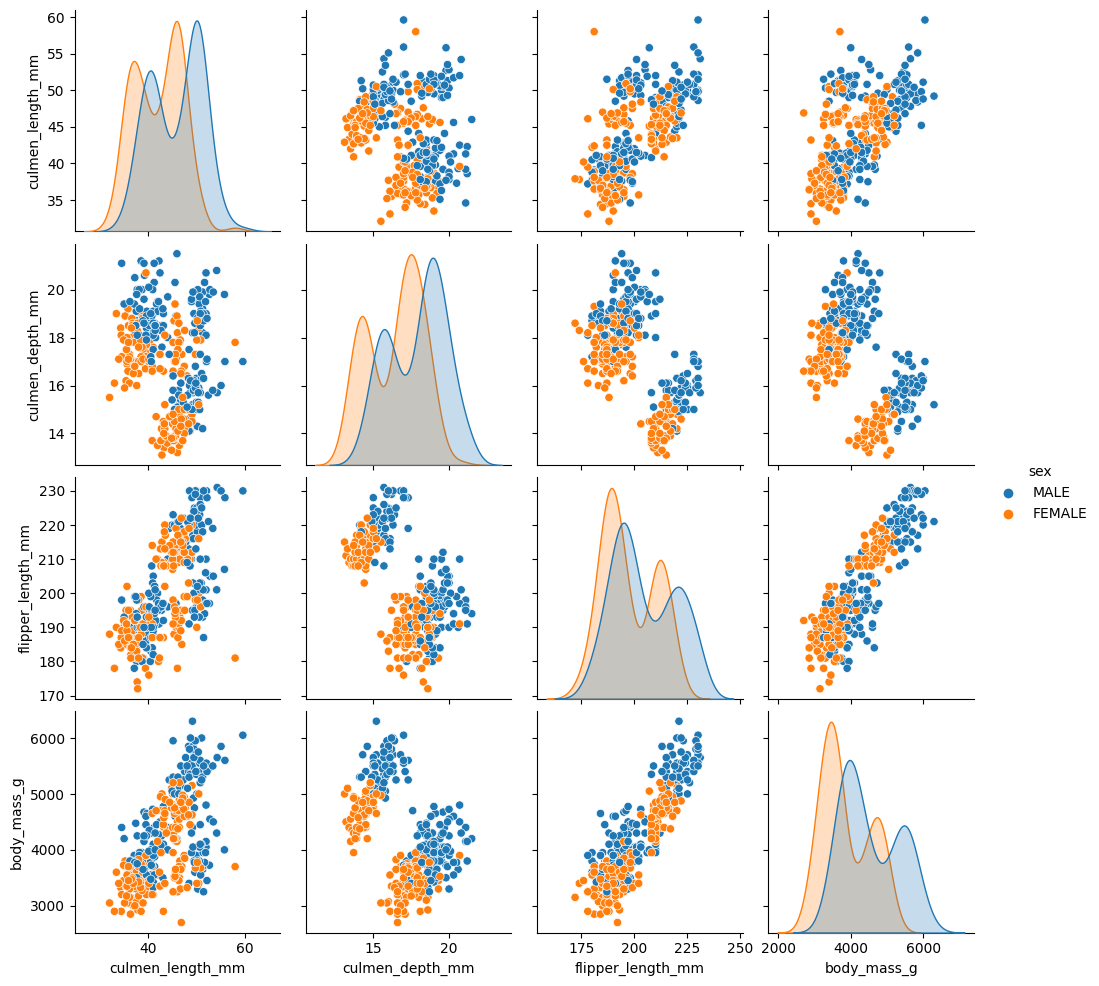

In [152]:
sns.pairplot(df.dropna(), hue="sex")

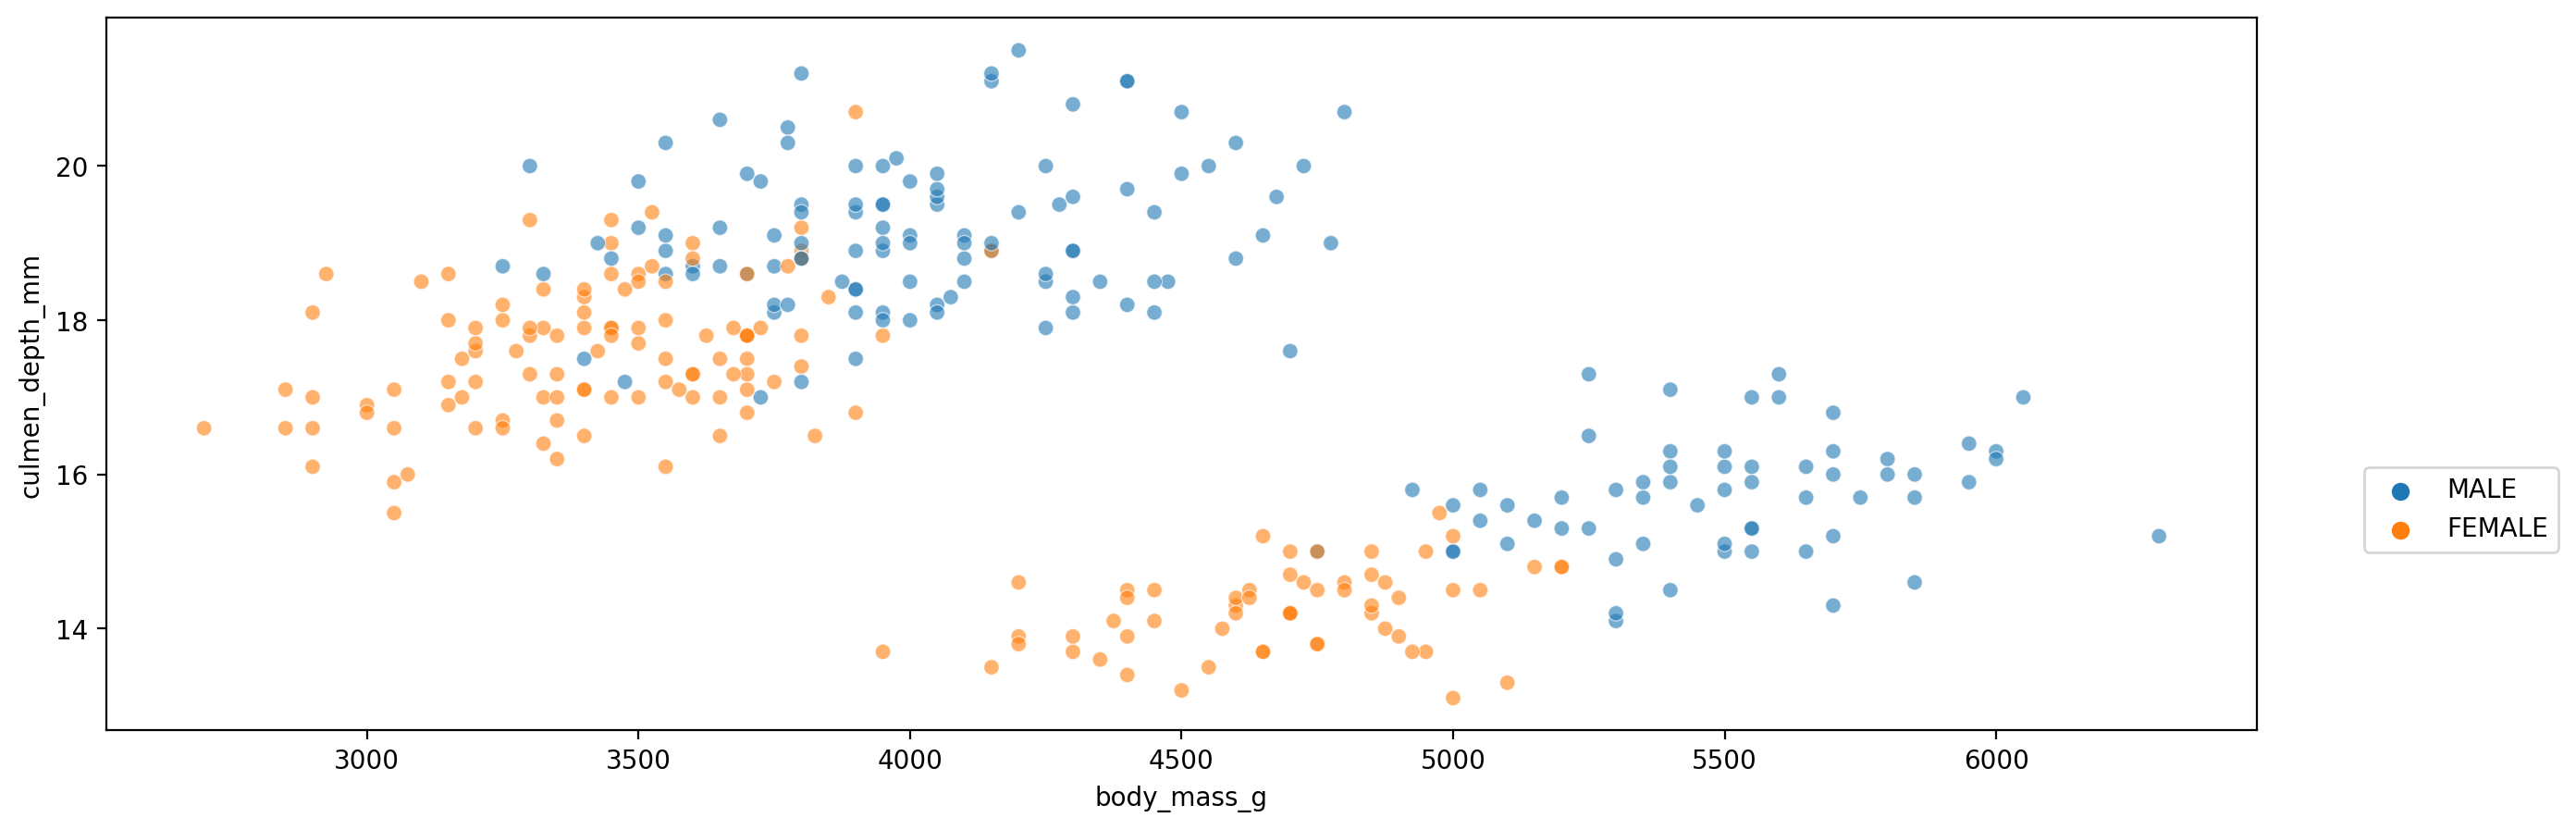

In [153]:
plt.figure(figsize=(15,5), dpi=200)
sns.scatterplot(x=df.dropna()["body_mass_g"], y=df.dropna()["culmen_depth_mm"],
                hue=df.dropna()["sex"], alpha=0.6)
plt.legend(loc=(1.05, 0.25))

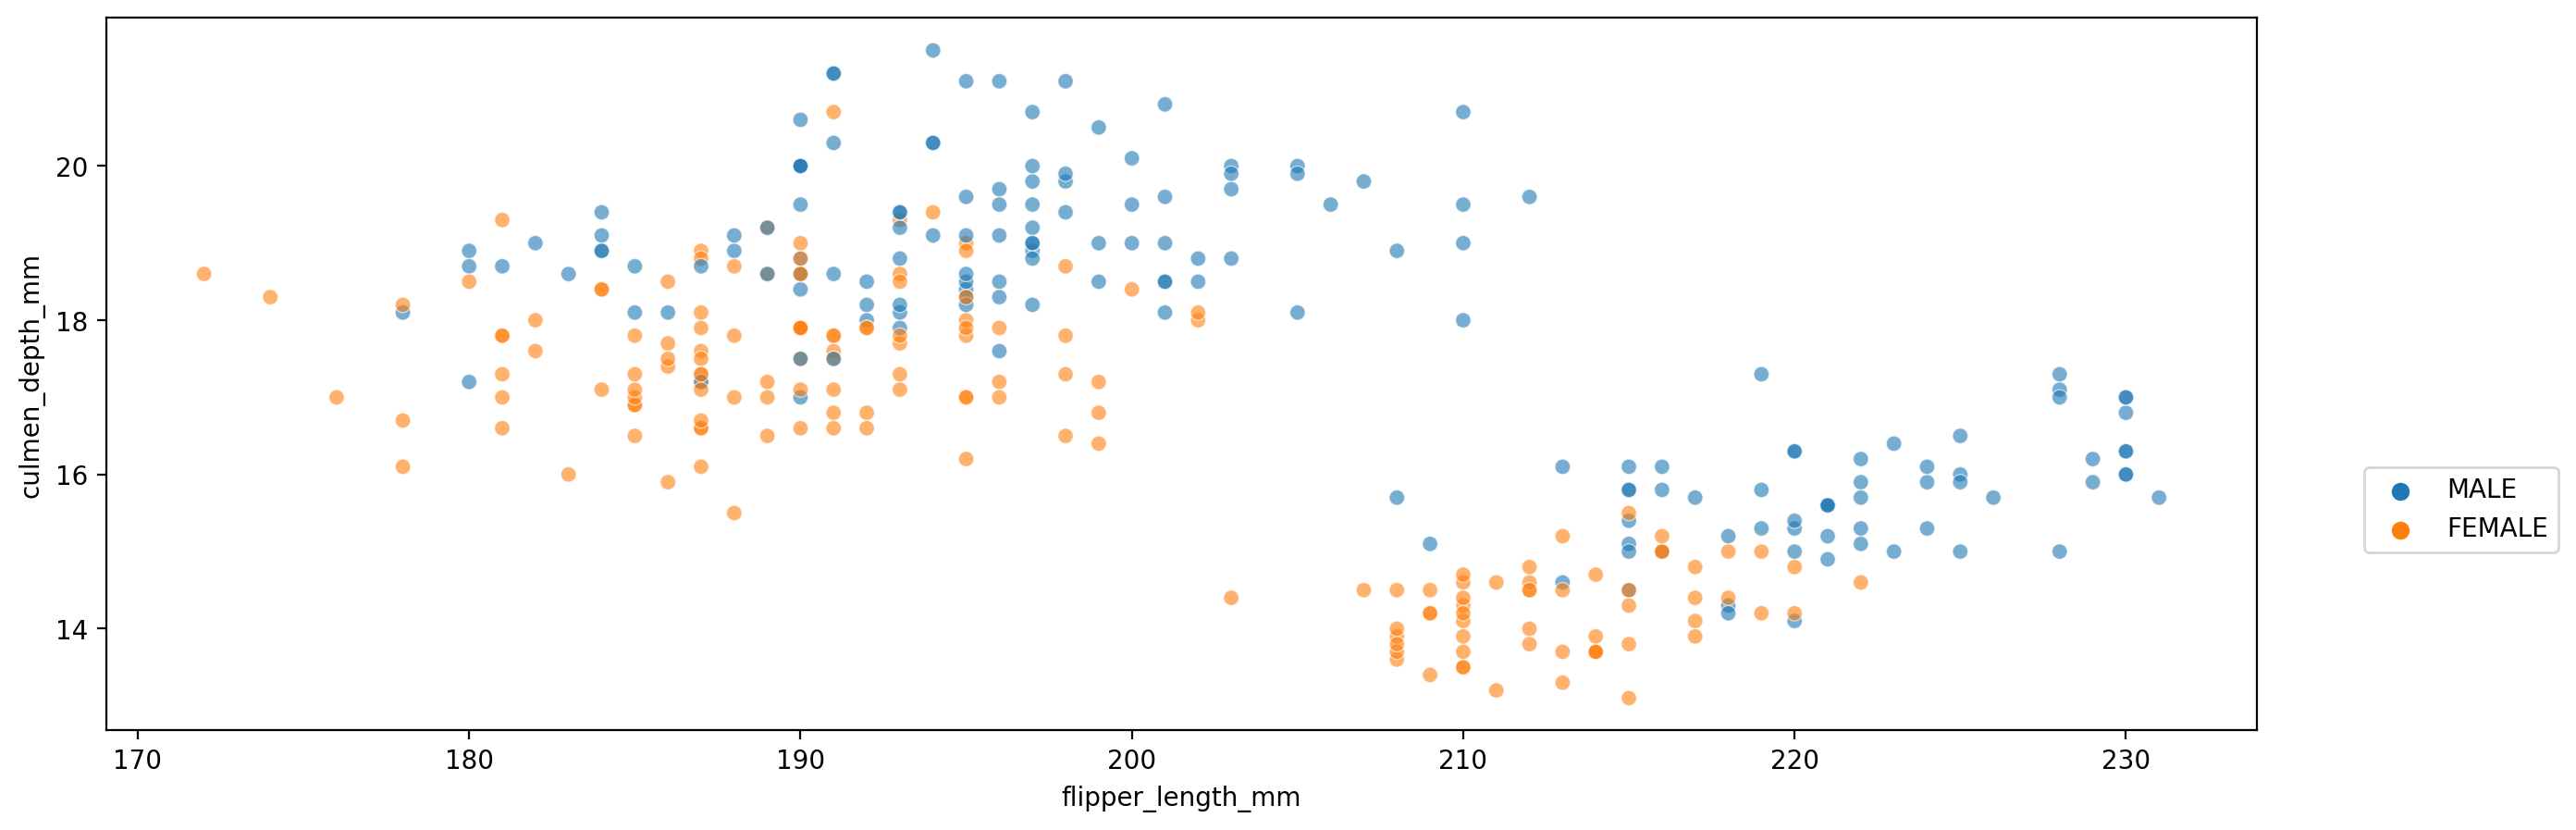

In [154]:
plt.figure(figsize=(15,5), dpi=200)
sns.scatterplot(x=df.dropna()["flipper_length_mm"], y=df.dropna()["culmen_depth_mm"],
                hue=df.dropna()["sex"], alpha=0.6)
plt.legend(loc=(1.05, 0.25))

### Based on these graphs, it appears that the only significant correlation that distinguishes male and female penguins is between culmen_depth_mm and body_mass_g. This means that the relationship between culmen_depth_mm and body_mass_g is different for male and female penguins, and this difference can be used to predict their sex.

In [155]:
df = df.fillna("Unknown")
df["sex"].unique()

array(['MALE', 'FEMALE', 'Unknown'], dtype=object)

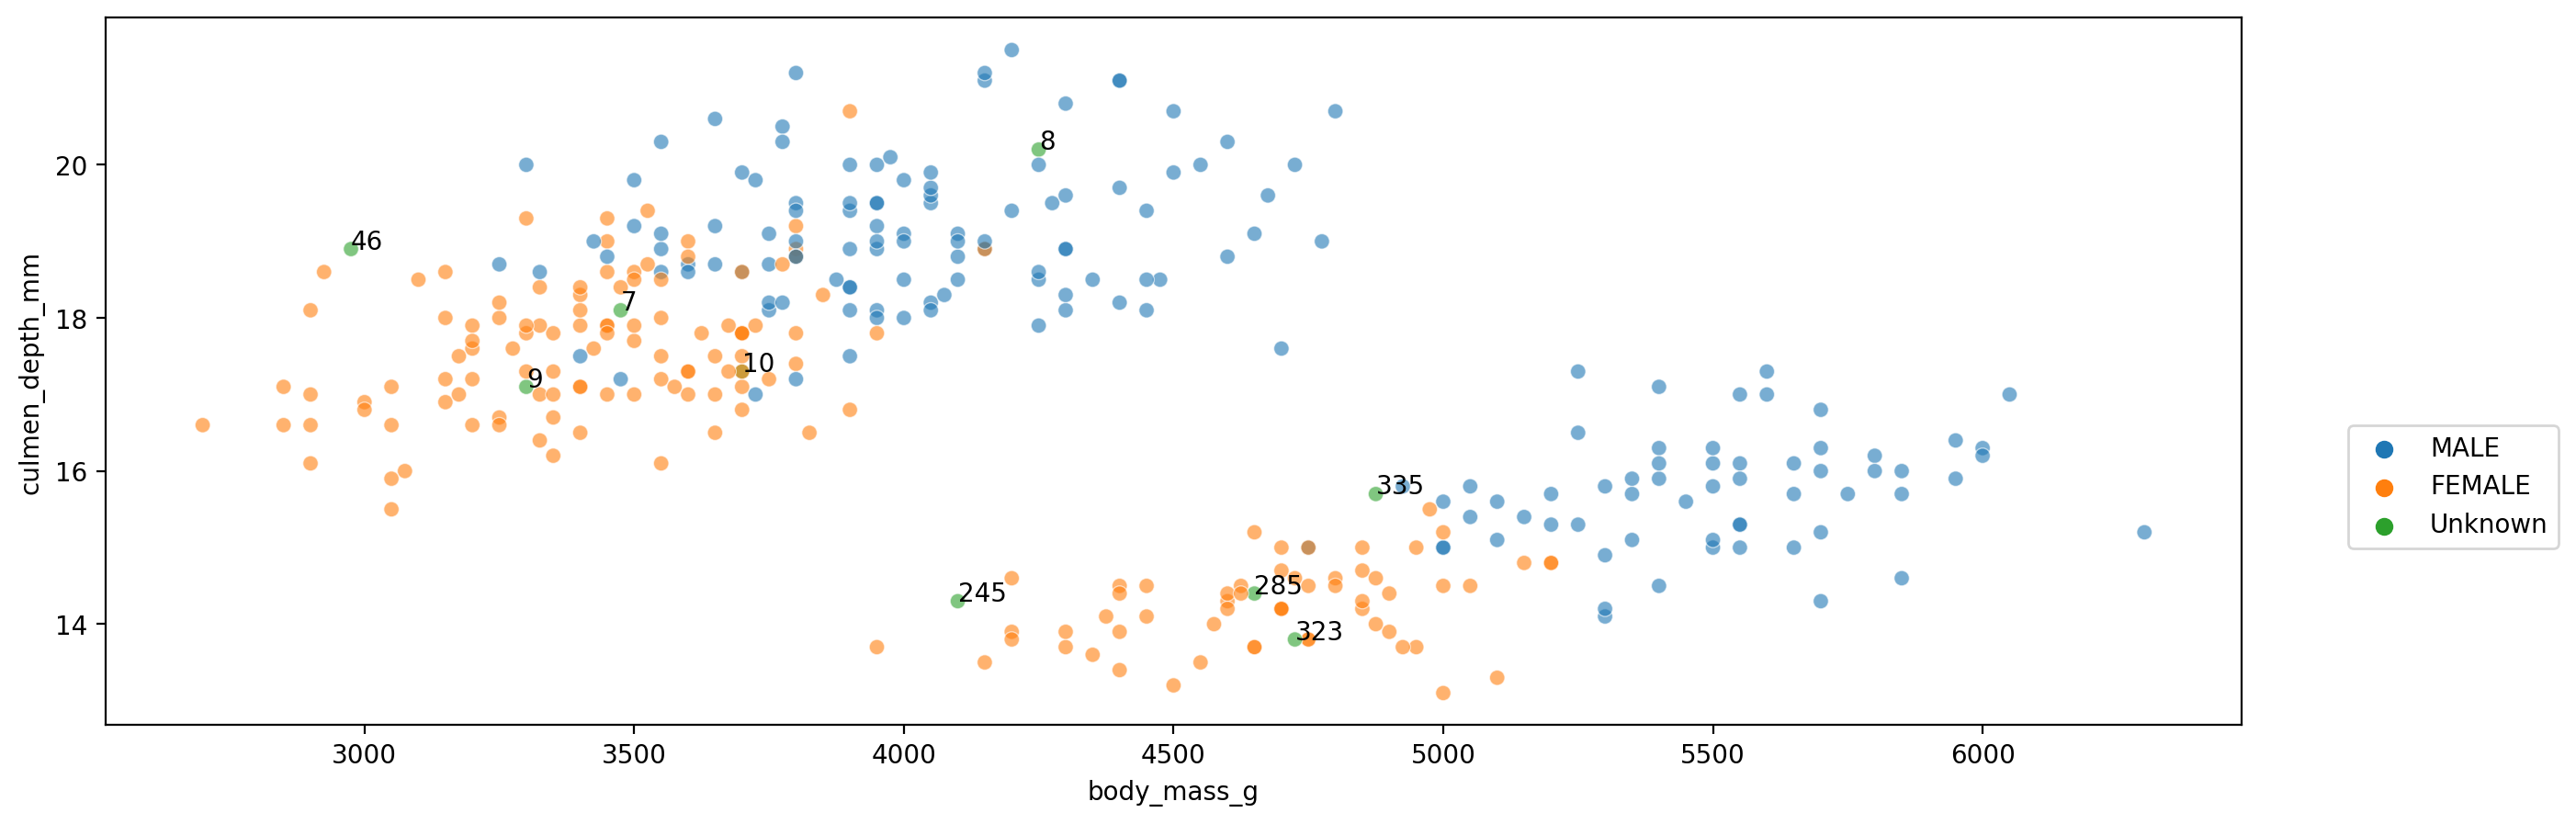

In [156]:
plt.figure(figsize=(15,5), dpi=200)
sns.scatterplot(x=df["body_mass_g"], y=df["culmen_depth_mm"],
                hue=df["sex"], alpha=0.6)
for sample in df.index:
    if df["sex"].iloc[sample] == "Unknown":
        plt.annotate(sample, (df["body_mass_g"].iloc[sample],
                              df["culmen_depth_mm"].iloc[sample]))

plt.legend(loc=(1.05, 0.25))

### Based on our dataset, we have designated the indexes of 7, 9, 10, 46, 245, 285, and 323 as belonging to the female category. Similarly, we have assigned the index of 8 as belonging to the male category. However, we have determined that the data at index 335 is not useful for our analysis and should be removed from the dataset.

In [157]:
df = df.drop([335], axis=0)

In [158]:
lst_of_unknown = list(df[df["sex"]=="Unknown"].index)

In [159]:
lst_of_unknown

[7, 8, 9, 10, 46, 245, 285, 323]

In [160]:
for index in lst_of_unknown:
    if index == 8:
        df.loc[index, "sex"] = "MALE"
        continue
    
    df.loc[index, "sex"] = "FEMALE"
    
    

In [161]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 341 entries, 0 to 341
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            341 non-null    object 
 1   island             341 non-null    object 
 2   culmen_length_mm   341 non-null    float64
 3   culmen_depth_mm    341 non-null    float64
 4   flipper_length_mm  341 non-null    float64
 5   body_mass_g        341 non-null    float64
 6   sex                341 non-null    object 
dtypes: float64(4), object(3)
memory usage: 29.4+ KB


In [162]:
df = df.reset_index()

In [163]:
df = df.drop("index", axis=1)

In [164]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 341 entries, 0 to 340
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            341 non-null    object 
 1   island             341 non-null    object 
 2   culmen_length_mm   341 non-null    float64
 3   culmen_depth_mm    341 non-null    float64
 4   flipper_length_mm  341 non-null    float64
 5   body_mass_g        341 non-null    float64
 6   sex                341 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.8+ KB


# VISUALIZATION

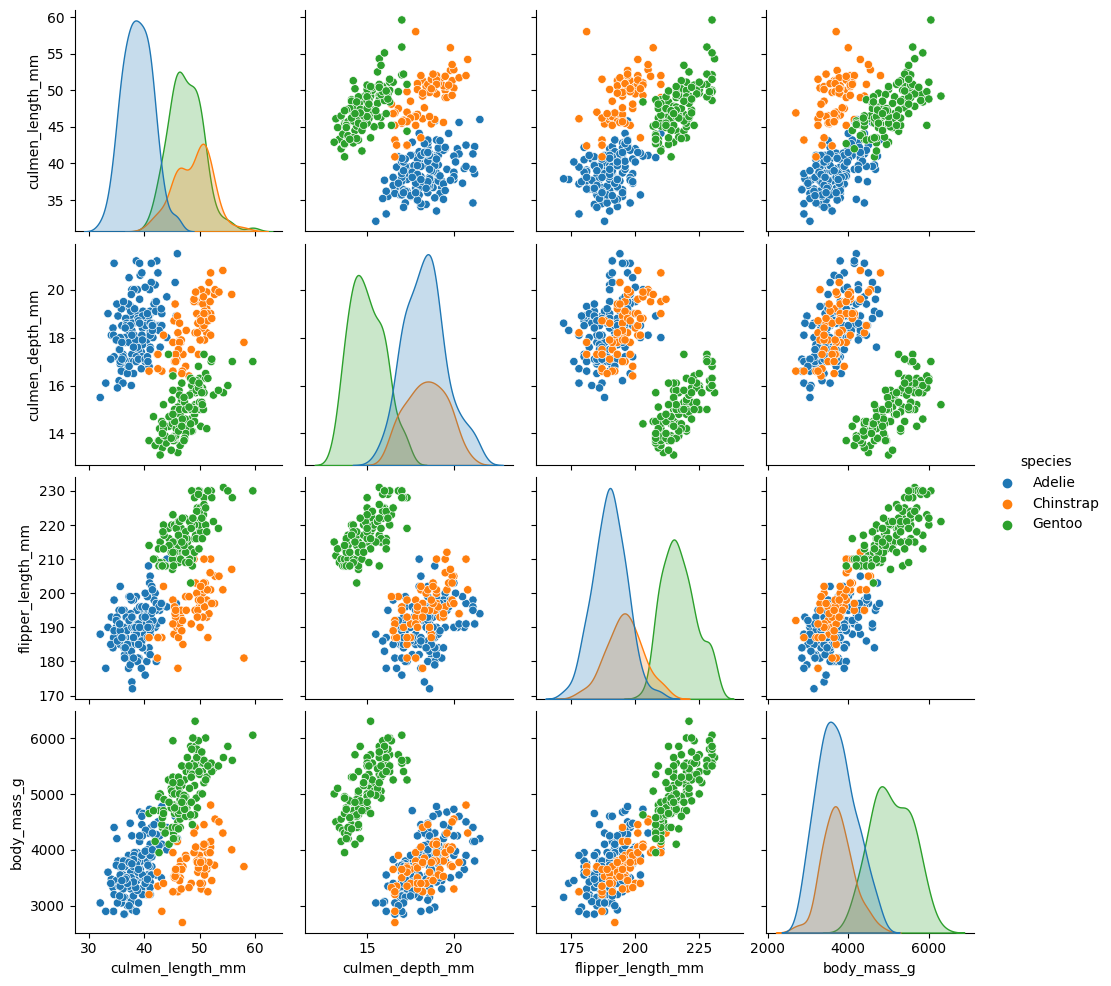

In [165]:
sns.pairplot(df , hue="species")

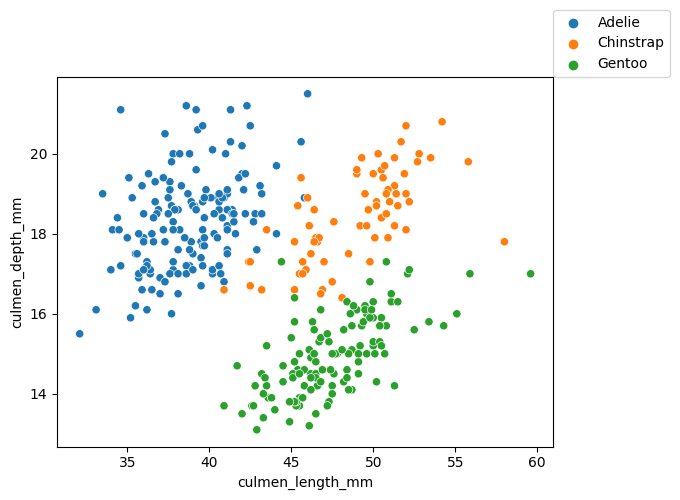

In [166]:
sns.scatterplot(x='culmen_length_mm', y='culmen_depth_mm', data=df, hue='species')
plt.legend(loc=(1,1))

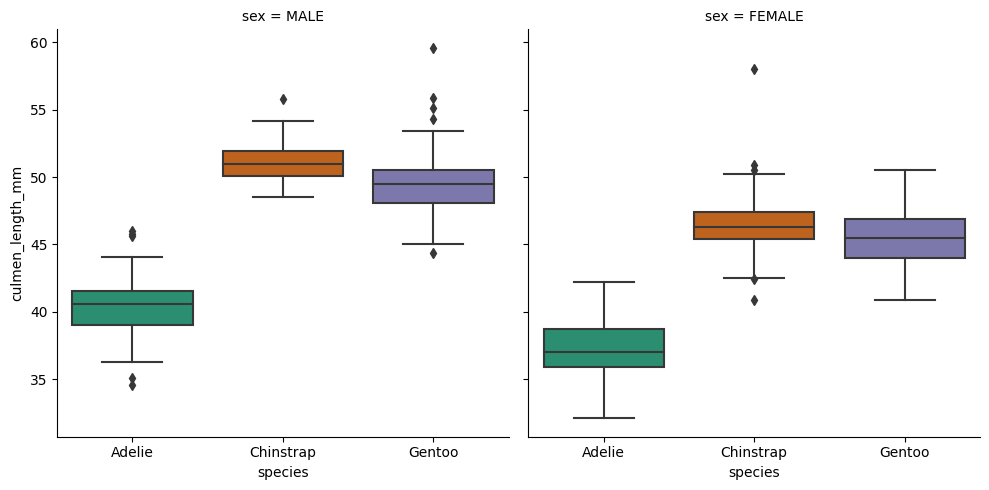

In [167]:
sns.catplot(x="species", y="culmen_length_mm",
            data=df, kind="box", col="sex", palette="Dark2")

# TRAIN | TEST SPLIT & ONE HOT ENCODING

In [168]:
X = pd.get_dummies(df.drop("species", axis=1), drop_first=True)
y = df["species"]

In [169]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3, random_state=101)

# CREATING an INITIAL DECISION TREE MODEL for CLASSIFICATION PURPOSES

In [170]:
model = DecisionTreeClassifier()

In [171]:
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [172]:
base_pred = model.predict(X_test)

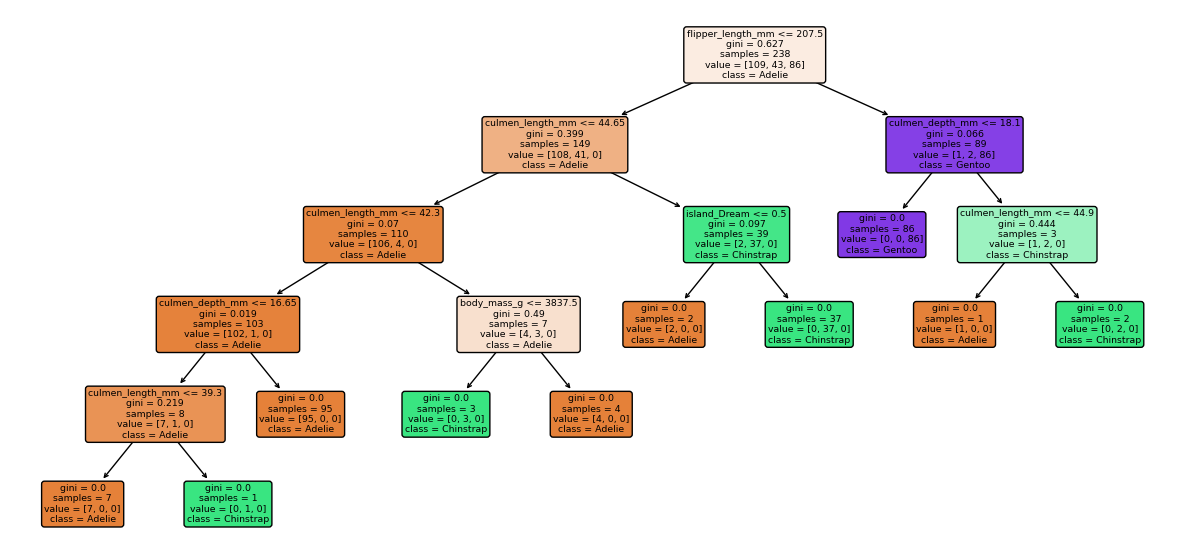

In [173]:
plt.figure(figsize=(15,7))
plot_tree(model, filled=True, rounded=True,
          class_names=list(df["species"].unique()), feature_names=X.columns);

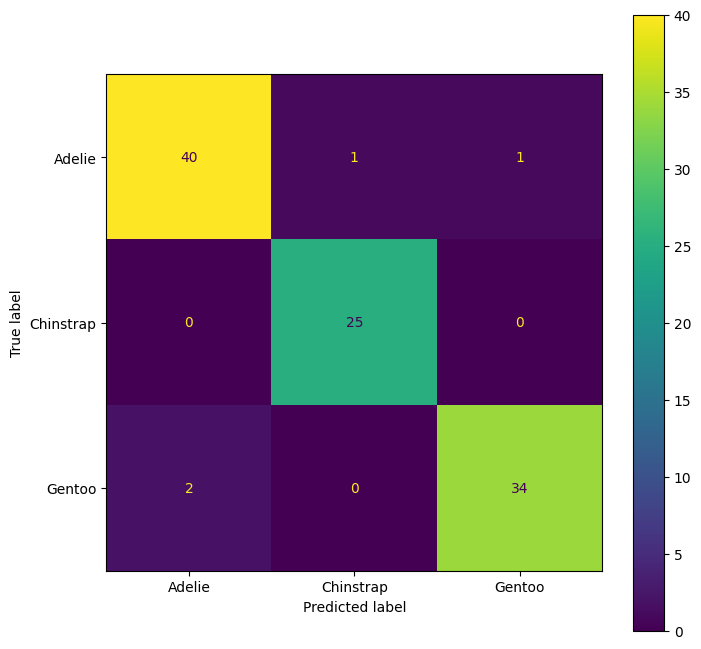

In [174]:
disp = ConfusionMatrixDisplay(confusion_matrix(y_test, base_pred), 
                              display_labels=list(df["species"].unique()))
fig, ax = plt.subplots(figsize=(8, 8))
disp.plot(ax=ax)
plt.show()

In [175]:
print(classification_report(y_test,base_pred))

              precision    recall  f1-score   support

      Adelie       0.95      0.95      0.95        42
   Chinstrap       0.96      1.00      0.98        25
      Gentoo       0.97      0.94      0.96        36

    accuracy                           0.96       103
   macro avg       0.96      0.97      0.96       103
weighted avg       0.96      0.96      0.96       103



In [176]:
model.feature_importances_

array([0.35725831, 0.03176156, 0.56257708, 0.02297427, 0.02542878,
       0.        , 0.        ])

In [177]:
pd.DataFrame(index=X.columns,data=model.feature_importances_,columns=['Feature Importance'])

,Feature Importance
culmen_length_mm,0.357258
culmen_depth_mm,0.031762
flipper_length_mm,0.562577
body_mass_g,0.022974
island_Dream,0.025429
island_Torgersen,0.000000
sex_MALE,0.000000


# PRUNING THE TREE

In [178]:
path = model.cost_complexity_pruning_path(X_train, y_train)


In [179]:
ccp_alphas = path.ccp_alphas[:-1]

In [180]:
models = []

for ccp_alpha in ccp_alphas:
    model = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    model.fit(X_train, y_train)
    models.append(model)

In [181]:
models

[DecisionTreeClassifier(random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.004160887656033292, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.0056022408963585435, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.012034681480712323, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.015944839474251234, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.018946904604538444, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.20139612986040145, random_state=0)]

In [182]:
models[2].score

<bound method ClassifierMixin.score of DecisionTreeClassifier(ccp_alpha=0.0056022408963585435, random_state=0)>

In [183]:
def func():
    train_scores = [model.score(X_train, y_train) for model in models]
    test_scores = [model.score(X_test, y_test) for model in models] 

    fig, ax = plt.subplots(figsize=(13,8))
    ax.set_xlabel("alpha")
    ax.set_ylabel("accuracy")
    ax.set_title("Accuracy vs alpha for training and testing datasets")
    ax.plot(ccp_alphas, train_scores, marker="o", label="train", drawstyle="steps-post")
    ax.plot(ccp_alphas, test_scores, marker="o", label="test", drawstyle="steps-post")
    ax.legend()

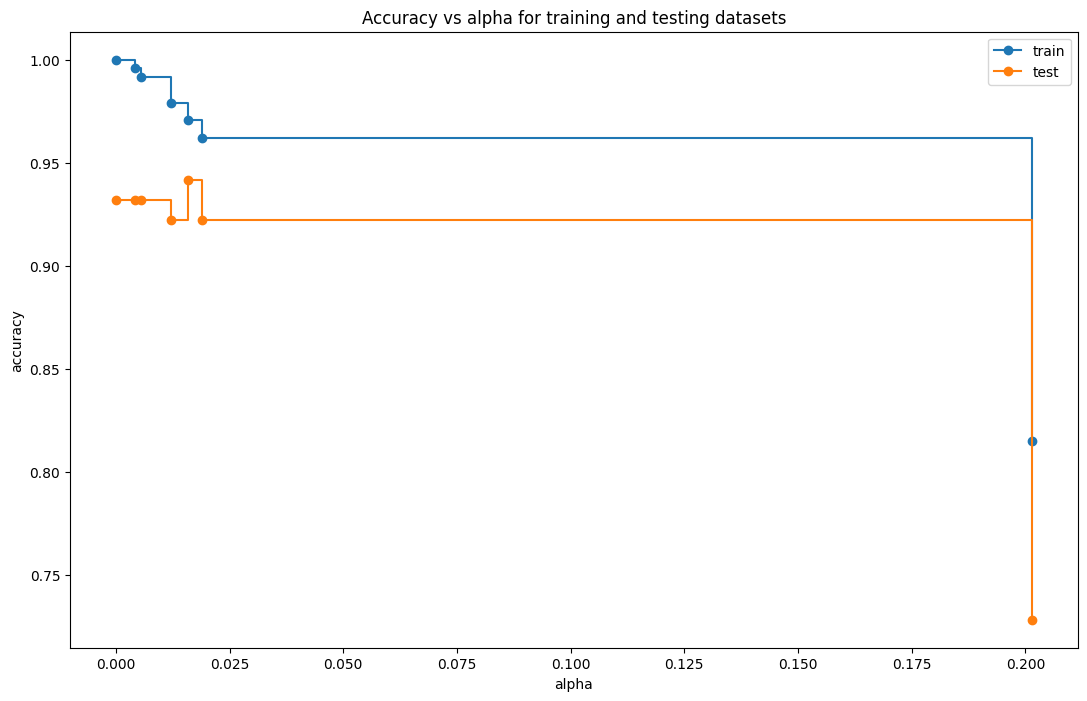

In [184]:
func();

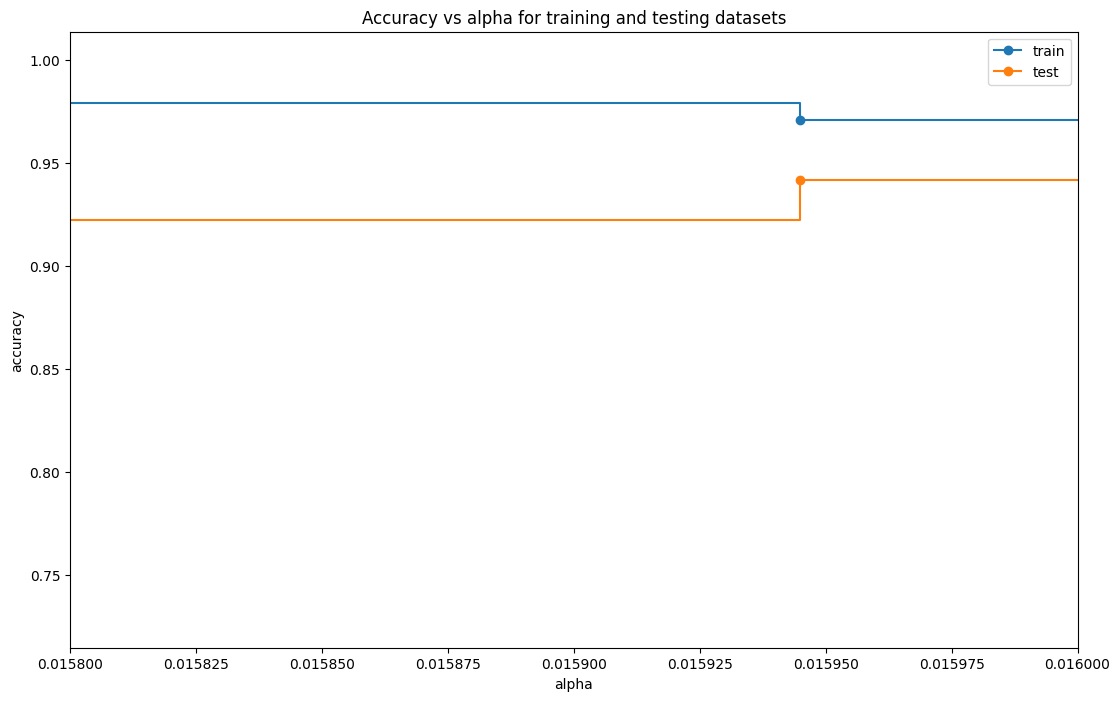

In [185]:
func()
plt.xlim(0.0158,0.0160);

### We can set ccp_alpha=0.016

In [186]:
model = DecisionTreeClassifier(ccp_alpha=0.016)

In [187]:
model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.016)

In [188]:
y_pred = model.predict(X_test)

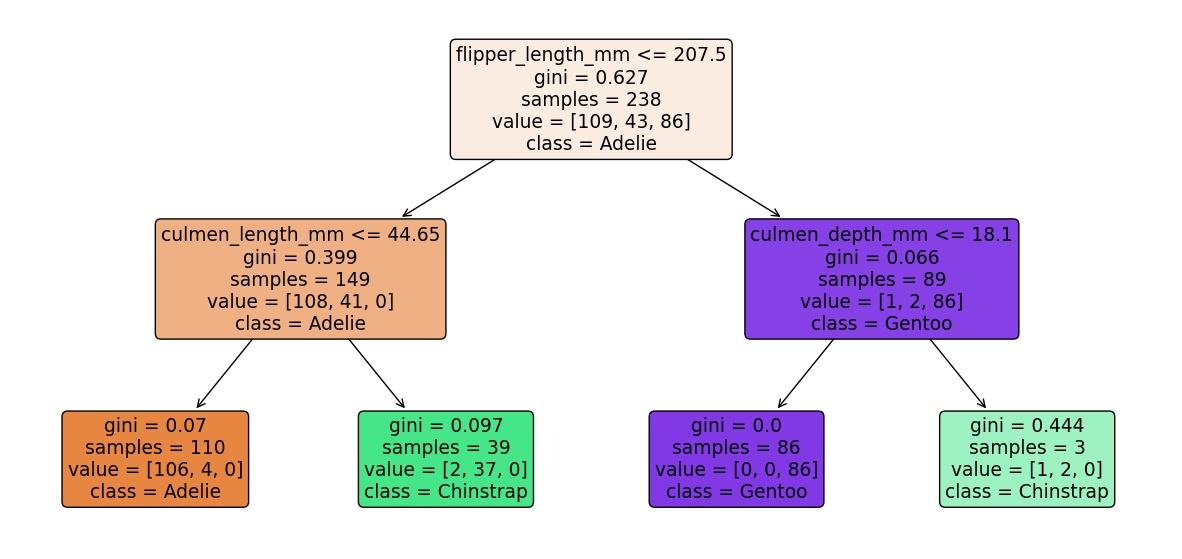

In [189]:
plt.figure(figsize=(15,7))
plot_tree(model, filled=True, rounded=True,
          class_names=list(df["species"].unique()), feature_names=X.columns);

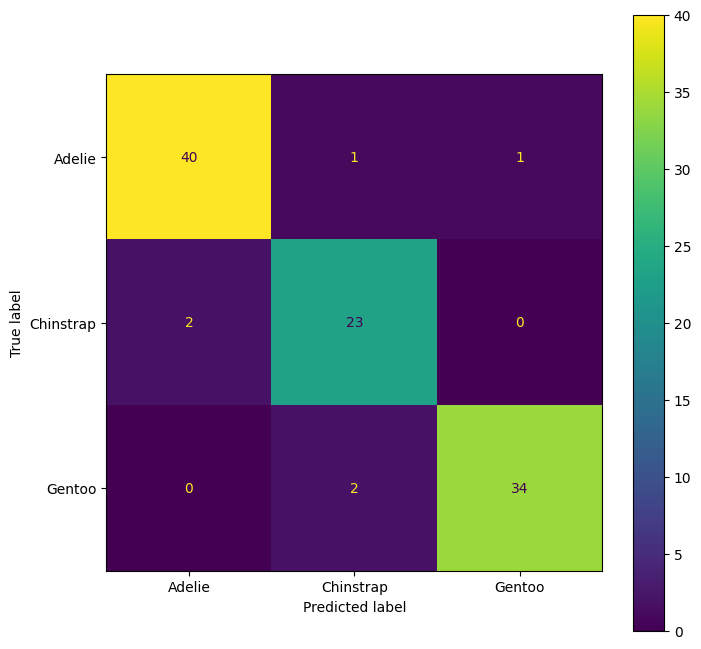

In [190]:
disp = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred), 
                              display_labels=list(df["species"].unique()))
fig, ax = plt.subplots(figsize=(8, 8))
disp.plot(ax=ax)
plt.show()

In [191]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      Adelie       0.95      0.95      0.95        42
   Chinstrap       0.88      0.92      0.90        25
      Gentoo       0.97      0.94      0.96        36

    accuracy                           0.94       103
   macro avg       0.94      0.94      0.94       103
weighted avg       0.94      0.94      0.94       103



### Based on the confusion matrix, it appears that even after implementing tree pruning techniques, the accuracy of the model has remained unchanged.

# Cost Complexity Pruning Part 2: Cross Validation for Finding the Best ALPHA

In [192]:
ccp_alphas

array([0.        , 0.00416089, 0.00560224, 0.01203468, 0.01594484,
       0.0189469 , 0.20139613])

In [193]:
alpha_loop_values = []

for ccp_alpha in ccp_alphas:
    model = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    scores = cross_val_score(model, X_train, y_train, cv=5) # Returns accuracy!
    print(scores)
    alpha_loop_values.append([ccp_alpha, np.mean(scores), np.std(scores)])

[1.         0.95833333 0.95833333 0.9787234  0.9787234 ]
[1.         0.95833333 0.95833333 0.9787234  0.9787234 ]
[0.95833333 0.95833333 0.97916667 0.9787234  0.95744681]
[0.9375     0.95833333 0.95833333 0.9787234  0.93617021]
[0.9375     0.95833333 0.95833333 0.9787234  0.93617021]
[0.9375     0.95833333 0.95833333 0.9787234  0.93617021]
[0.9375     0.9375     0.79166667 0.82978723 0.93617021]


In [194]:
alpha_results = pd.DataFrame(data=alpha_loop_values, 
                             columns=["alpha", "mean accuracy", "std"])

(0.004, 0.0045)

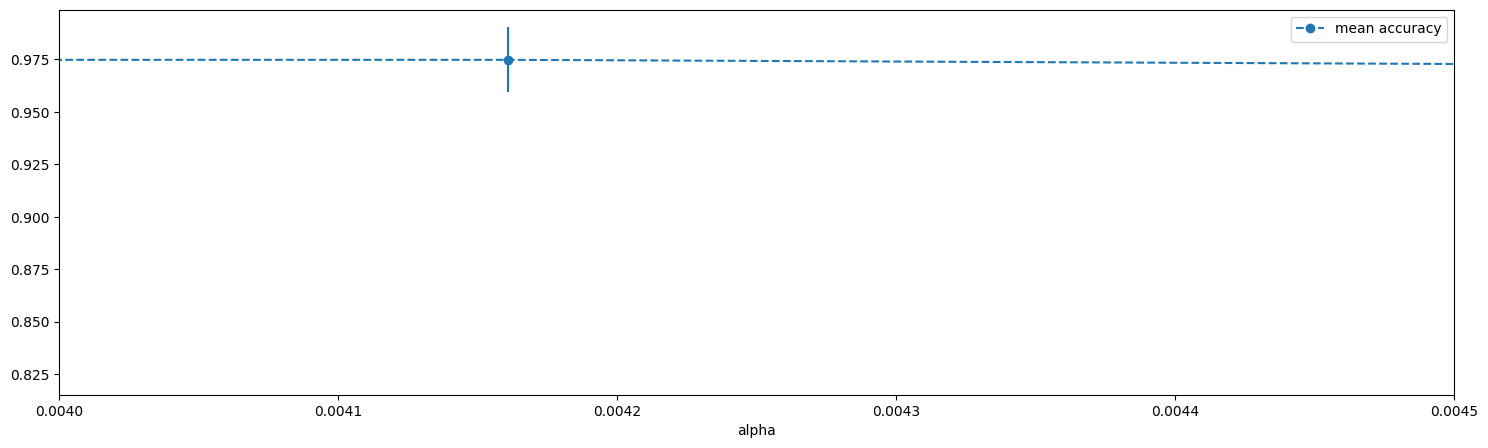

In [195]:
alpha_results.plot(x="alpha", y="mean accuracy",
                   yerr="std", marker="o", linestyle="--", figsize=(18,5))
plt.xlim(0.004,0.0045)

### So instead of setting ccp_alpha=0.016, we need to set it something closer 0.042

In [196]:
alpha_results["alpha"]

0    0.000000
1    0.004161
2    0.005602
3    0.012035
4    0.015945
5    0.018947
6    0.201396
Name: alpha, dtype: float64

In [197]:
ideal_alpha = alpha_results["alpha"].iloc[1]

In [198]:
model = DecisionTreeClassifier(ccp_alpha=ideal_alpha)
model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.004160887656033292)

In [199]:
y_pred = model.predict(X_test)

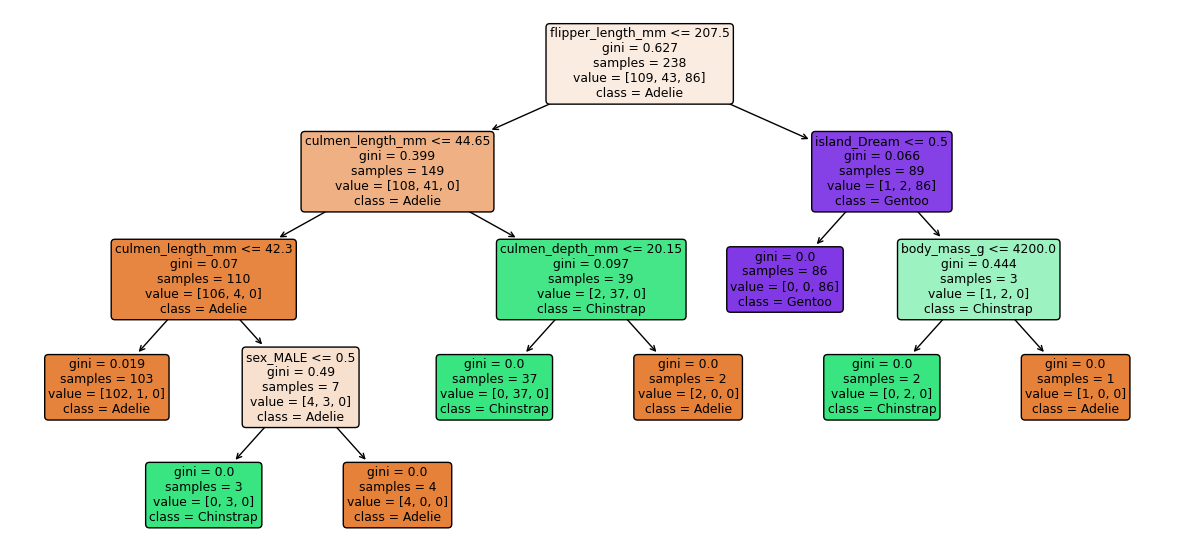

In [200]:
plt.figure(figsize=(15,7))
plot_tree(model, filled=True, rounded=True,
          class_names=list(df["species"].unique()), feature_names=X.columns);

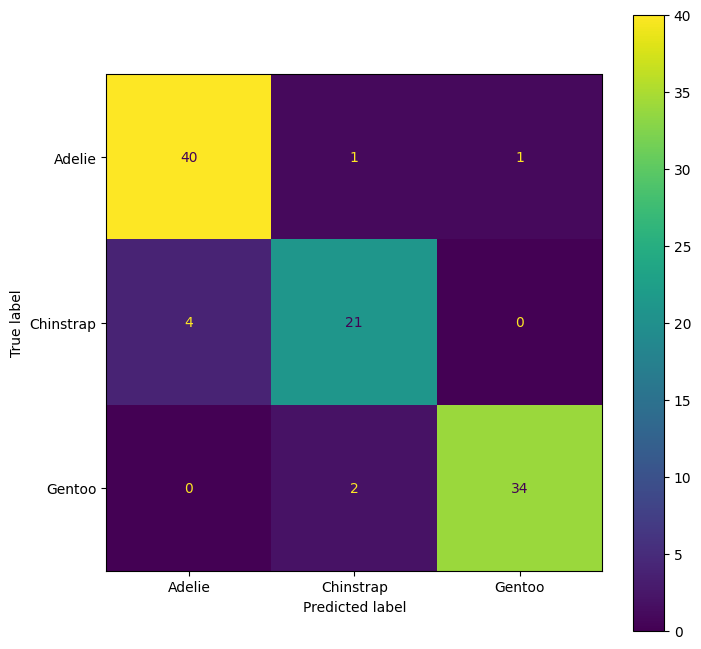

In [201]:
disp = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred), 
                              display_labels=list(df["species"].unique()))
fig, ax = plt.subplots(figsize=(8, 8))
disp.plot(ax=ax)
plt.show()

In [137]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      Adelie       0.95      0.95      0.95        42
   Chinstrap       0.88      0.92      0.90        25
      Gentoo       0.97      0.94      0.96        36

    accuracy                           0.94       103
   macro avg       0.94      0.94      0.94       103
weighted avg       0.94      0.94      0.94       103



## After conducting experiments, I have determined that applying pruning techniques and cross-validation did not result in a substantial improvement in the accuracy of the model. It is noteworthy that the full-sized decision tree model did not exhibit overfitting and achieved a high accuracy score.